In [1]:
import numpy as np
from cluster_sim.app.holes import Holes
from cluster_sim.app.grid import Grid
from cluster_sim.app.utils import get_node_coords

import os
from joblib import delayed, Parallel
import time
from analysis_funcs import algorithm1, apply_error_channel, ParallelTqdm, rhgrules_extended
import networkx as nx

os.makedirs("./data", exist_ok=True)

shape = [40, 40, 200]
seed = 12345

samples = 1

# The probabilities to simulate
p_vec = np.linspace(0, 0.05, 10)

# Input vector for all jobs
jobs_input_vec = p_vec

In [8]:
def main(input_params):
    """
    Main function for parallel processing. Here, we:

    1. Create a grid of the given shape
    2. Apply the error channel to the grid
    3. Generate a RHG lattice
    4. Look at clusters of the RHG lattice
    5. Return the results

    Returns:
        - p: The input parameter for the simulation
        - percolates: The number of times percolation occurred (True: 1, False: 0)
        - times: The average time taken for the simulation
    """
    
    p = input_params

    # Sanity check: check that this is equal to the move_list on the app
    # print(np.reshape(np.argwhere(removed_nodes == True), shape=-1))
    
    
    
    # How much nodes in an RHG lattice, when no deletion errors?
    G2 = Grid(shape)
    # Generate an RHG lattice out of G
    G2, _, _ = algorithm1(G2, D=Holes(shape), removed_nodes=np.zeros(shape[0] * shape[1] * shape[2], dtype=bool), shape=shape)

    G2_nx = G2.to_networkx()
    G2_nx.remove_nodes_from(list(nx.isolates(G2_nx)))
    ideal_rhg_num_nodes = G2_nx.number_of_nodes() 

    times = np.zeros(samples)

    for i in range(samples):
        start = time.time()

        G = Grid(shape)
        removed_nodes = np.zeros(shape[0] * shape[1] * shape[2], dtype=bool)

        G, D, removed_nodes = apply_error_channel(p, seed + i, shape, removed_nodes, G)

        # Generate an RHG lattice out of G
        G, removed_nodes, offsets = rhgrules_extended(G, D, removed_nodes, shape)

        # Algorithm 1
        # G, removed_nodes, offsets = algorithm1(G, D, removed_nodes, shape)

        # Remove isolated nodes.
        G_nx = G.to_networkx()
        G_nx.remove_nodes_from(list(nx.isolates(G_nx)))
        
        reconstructed_rhg_num_nodes = G_nx.number_of_nodes()
        
        print(reconstructed_rhg_num_nodes, ideal_rhg_num_nodes)

        times[i] = time.time() - start 

    return (p, reconstructed_rhg_num_nodes, ideal_rhg_num_nodes, times.mean())


In [9]:
results = ParallelTqdm(n_jobs=-1)([delayed(main)(x) for x in jobs_input_vec])
results = np.array(results)
print(results)

  0%|          | 0/10 [00:00<?, ?tasks/s]

hole locations [1152. 1178. 1181. 1164. 1199. 1214. 1170. 1226. 1200. 1218. 1180. 1216.
 1231. 1202. 1250. 1209. 1201. 1208. 1194. 1176. 1225. 1175. 1166. 1227.
 1174. 1186. 1206.]
hole locations [2888. 2896. 2924. 2905. 3041. 3049. 2881. 2960. 3005. 2939. 3004. 2899.
 2895. 3088. 2963. 2974. 3110. 3022. 2948. 2900. 2938. 2917. 2997. 3015.
 2938. 2961. 3016.]
hole locations [2311. 2381. 2328. 2369. 2405. 2418. 2391. 2506. 2519. 2317. 2427. 2367.
 2364. 2440. 2446. 2271. 2426. 2432. 2300. 2380. 2319. 2334. 2380. 2385.
 2302. 2427. 2432.]
hole locations [4022. 4204. 4154. 4147. 4257. 4333. 4067. 4142. 4181. 4026. 4193. 4152.
 4112. 4207. 4292. 4146. 4206. 4254. 4014. 4203. 4062. 4037. 4154. 4139.
 4153. 4235. 4183.]
hole locations [3414. 3556. 3478. 3503. 3591. 3572. 3471. 3604. 3648. 3427. 3485. 3470.
 3565. 3569. 3613. 3543. 3592. 3699. 3458. 3567. 3439. 3524. 3579. 3510.
 3542. 3642. 3636.]
hole locations [531. 613. 592. 576. 628. 640. 584. 610. 611. 565. 577. 582. 628. 610.
 648. 633

 10%|█         | 1/10 [00:30<04:31, 30.21s/tasks]

205373 240000


 20%|██        | 2/10 [00:31<01:44, 13.05s/tasks]

207086 240000
203577 240000


 40%|████      | 4/10 [00:32<00:27,  4.56s/tasks]

204223 240000


 50%|█████     | 5/10 [00:32<00:15,  3.15s/tasks]

210011 240000
216960 240000


 60%|██████    | 6/10 [00:34<00:10,  2.53s/tasks]

208251 240000


 80%|████████  | 8/10 [00:34<00:02,  1.45s/tasks]

hole locations [4553. 4600. 4732. 4710. 4727. 4907. 4657. 4809. 4827. 4681. 4802. 4802.
 4643. 4734. 4782. 4684. 4910. 4796. 4631. 4700. 4781. 4725. 4764. 4893.
 4686. 4860. 4827.]
hole locations [5089. 5256. 5283. 5270. 5487. 5504. 5259. 5477. 5422. 5235. 5277. 5308.
 5323. 5415. 5436. 5342. 5435. 5384. 5183. 5288. 5264. 5319. 5474. 5440.
 5346. 5502. 5396.]


 90%|█████████ | 9/10 [00:43<00:03,  3.27s/tasks]

201820 240000


100%|██████████| 10/10 [00:44<00:00,  4.41s/tasks]

201175 240000
[[0.00000000e+00 2.16960000e+05 2.40000000e+05 2.43050611e+01]
 [5.55555556e-03 2.10011000e+05 2.40000000e+05 2.32203600e+01]
 [1.11111111e-02 2.08818000e+05 2.40000000e+05 2.43309240e+01]
 [1.66666667e-02 2.08251000e+05 2.40000000e+05 2.48308618e+01]
 [2.22222222e-02 2.07086000e+05 2.40000000e+05 2.59111450e+01]
 [2.77777778e-02 2.05373000e+05 2.40000000e+05 2.55086360e+01]
 [3.33333333e-02 2.04223000e+05 2.40000000e+05 2.68919780e+01]
 [3.88888889e-02 2.03577000e+05 2.40000000e+05 2.60985839e+01]
 [4.44444444e-02 2.01820000e+05 2.40000000e+05 6.69966292e+00]
 [5.00000000e-02 2.01175000e+05 2.40000000e+05 7.33546305e+00]]


Exception ignored in: <function ResourceTracker.__del__ at 0x102f4a980>
Traceback (most recent call last):
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10257a980>
Traceback (most recent call last):
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/zhihan/miniconda3/envs/mbqc/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No 

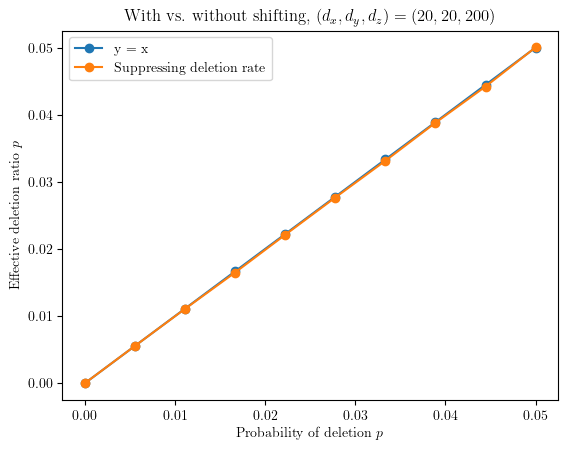

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern']    
    })

plt.plot(results[:, 0], results[:,0], "o-", label="y = x")
plt.plot(results[:, 0], (1 - results[:, 1]/results[:, 2]), "o-", label="Suppressing deletion rate")
plt.xlabel(r"Probability of deletion $p$")
plt.ylabel(r"Effective deletion ratio $p$")
plt.title(r"With vs. without shifting, $(d_x, d_y, d_z)=(20, 20, 200)$")
plt.legend()
#plt.savefig(f"data/effective_ratio.pdf", dpi=300)
